In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from lazypredict.Supervised import LazyClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

## EDA

In [3]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3956,26357,Male,36.00,0,0,No,Private,Urban,200.68,25.80,Unknown,0
4650,68074,Male,54.00,0,0,Yes,Private,Rural,100.47,50.20,formerly smoked,0
2720,2457,Female,67.00,0,1,Yes,Self-employed,Rural,94.45,29.60,formerly smoked,0
1521,17078,Male,71.00,0,0,Yes,Private,Urban,108.43,32.80,smokes,0
3676,69462,Female,4.00,0,0,No,children,Rural,109.81,17.90,Unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5110 entries, 0 to 5109

Data columns (total 12 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   id                 5110 non-null   int64  

 1   gender             5110 non-null   object 

 2   age                5110 non-null   float64

 3   hypertension       5110 non-null   int64  

 4   heart_disease      5110 non-null   int64  

 5   ever_married       5110 non-null   object 

 6   work_type          5110 non-null   object 

 7   Residence_type     5110 non-null   object 

 8   avg_glucose_level  5110 non-null   float64

 9   bmi                4909 non-null   float64

 10  smoking_status     5110 non-null   object 

 11  stroke             5110 non-null   int64  

dtypes: float64(3), int64(4), object(5)

memory usage: 479.2+ KB


In [5]:
df.shape

(5110, 12)

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.10,0.05,106.15,28.89,0.05
std,22.61,0.30,0.23,45.28,7.85,0.22
min,0.08,0.00,0.00,55.12,10.30,0.00
25%,25.00,0.00,0.00,77.25,23.50,0.00
50%,45.00,0.00,0.00,91.88,28.10,0.00
75%,61.00,0.00,0.00,114.09,33.10,0.00
max,82.00,1.00,1.00,271.74,97.60,1.00


In [8]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Handling Missing Values

In [11]:
df.bmi.fillna(df.bmi.mean(),inplace=True)

In [12]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4371,Female,44.00,0,0,Yes,Govt_job,Rural,108.38,27.70,Unknown,0
4943,Female,26.00,0,0,No,Private,Rural,67.21,21.80,formerly smoked,0
3071,Female,55.00,0,0,Yes,Private,Urban,102.36,24.20,never smoked,0
1230,Female,56.00,0,0,Yes,Self-employed,Urban,124.16,23.00,never smoked,0
379,Female,53.00,0,0,Yes,Private,Rural,68.76,35.60,formerly smoked,0


In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Figure size 2000x1500 with 0 Axes>

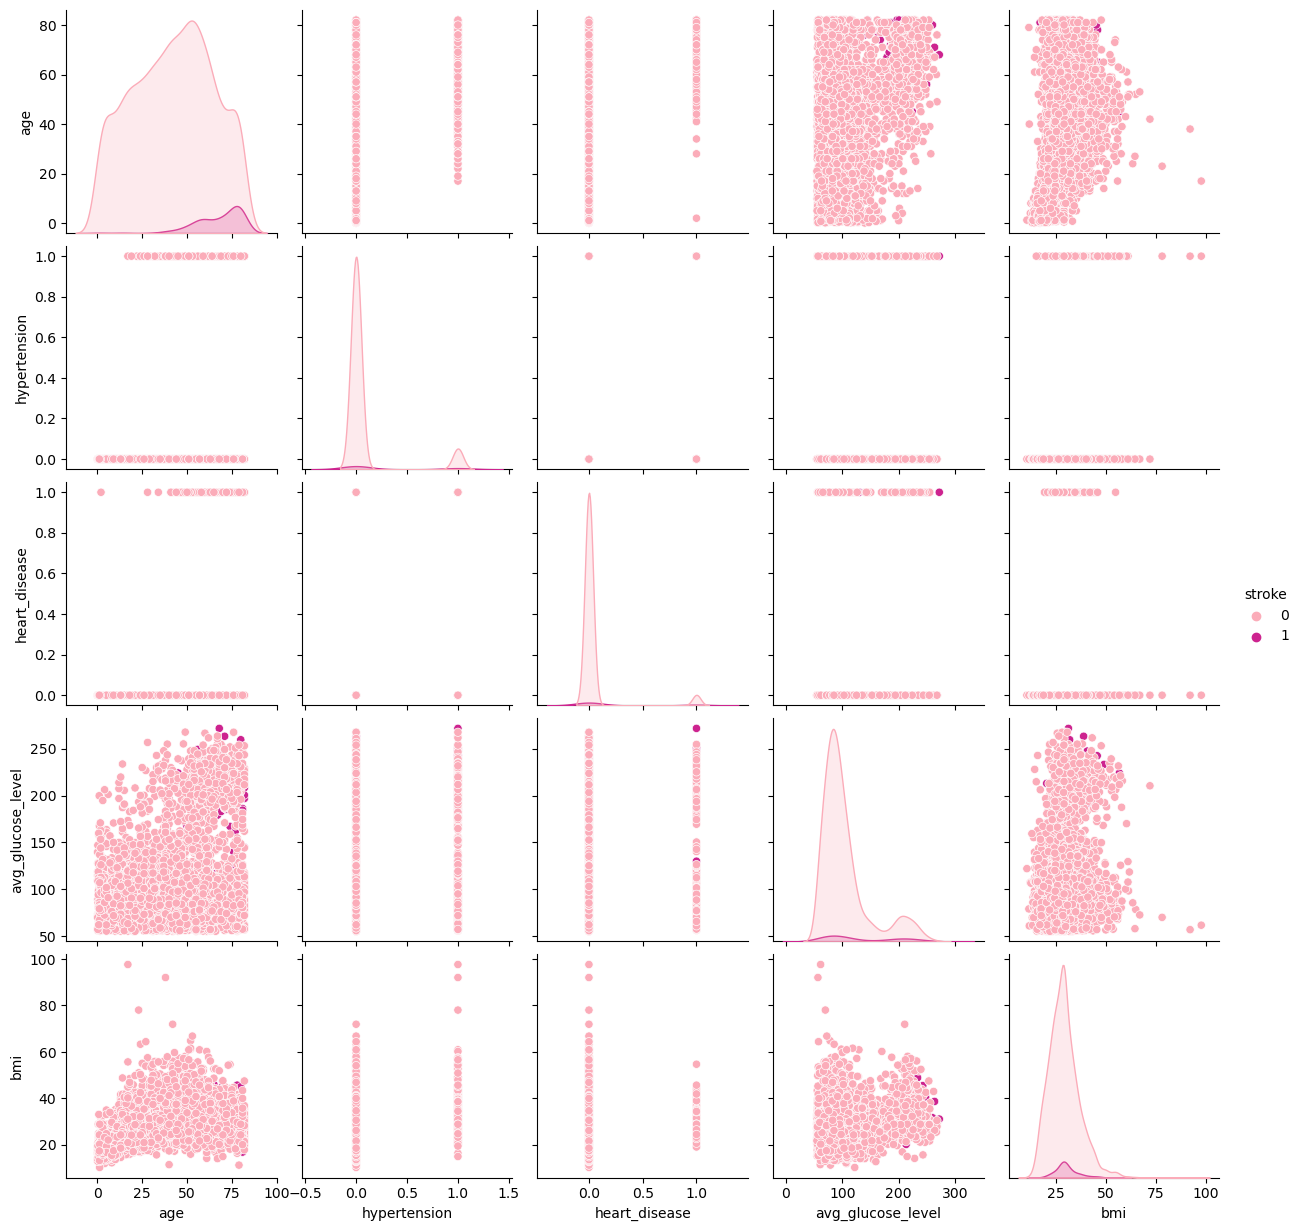

In [13]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette='RdPu');

In [14]:
dfnumerical=df[['age','avg_glucose_level','bmi']]
dfcategorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

Text(0.5, 1.0, 'kde for age, avg_glucose_level and bmi')

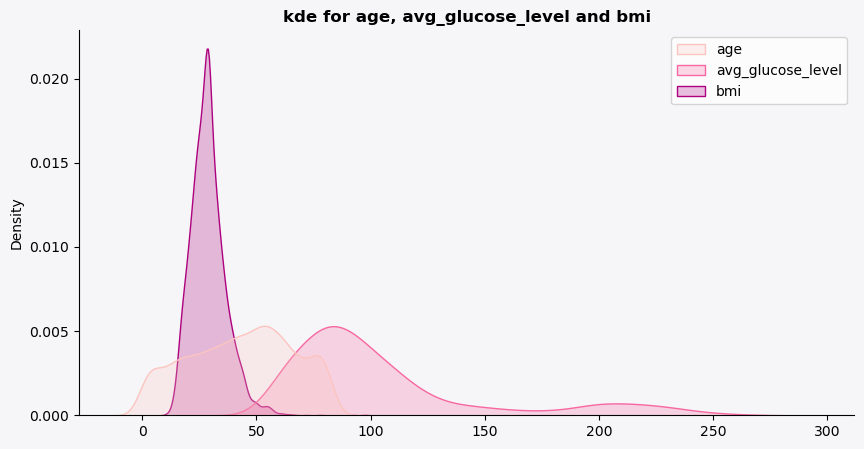

In [185]:
fig,ax=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f7')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)

sns.kdeplot(data=dfnumerical,shade=True,palette='RdPu')
plt.title("kde for age, avg_glucose_level and bmi",weight='bold')

In [16]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

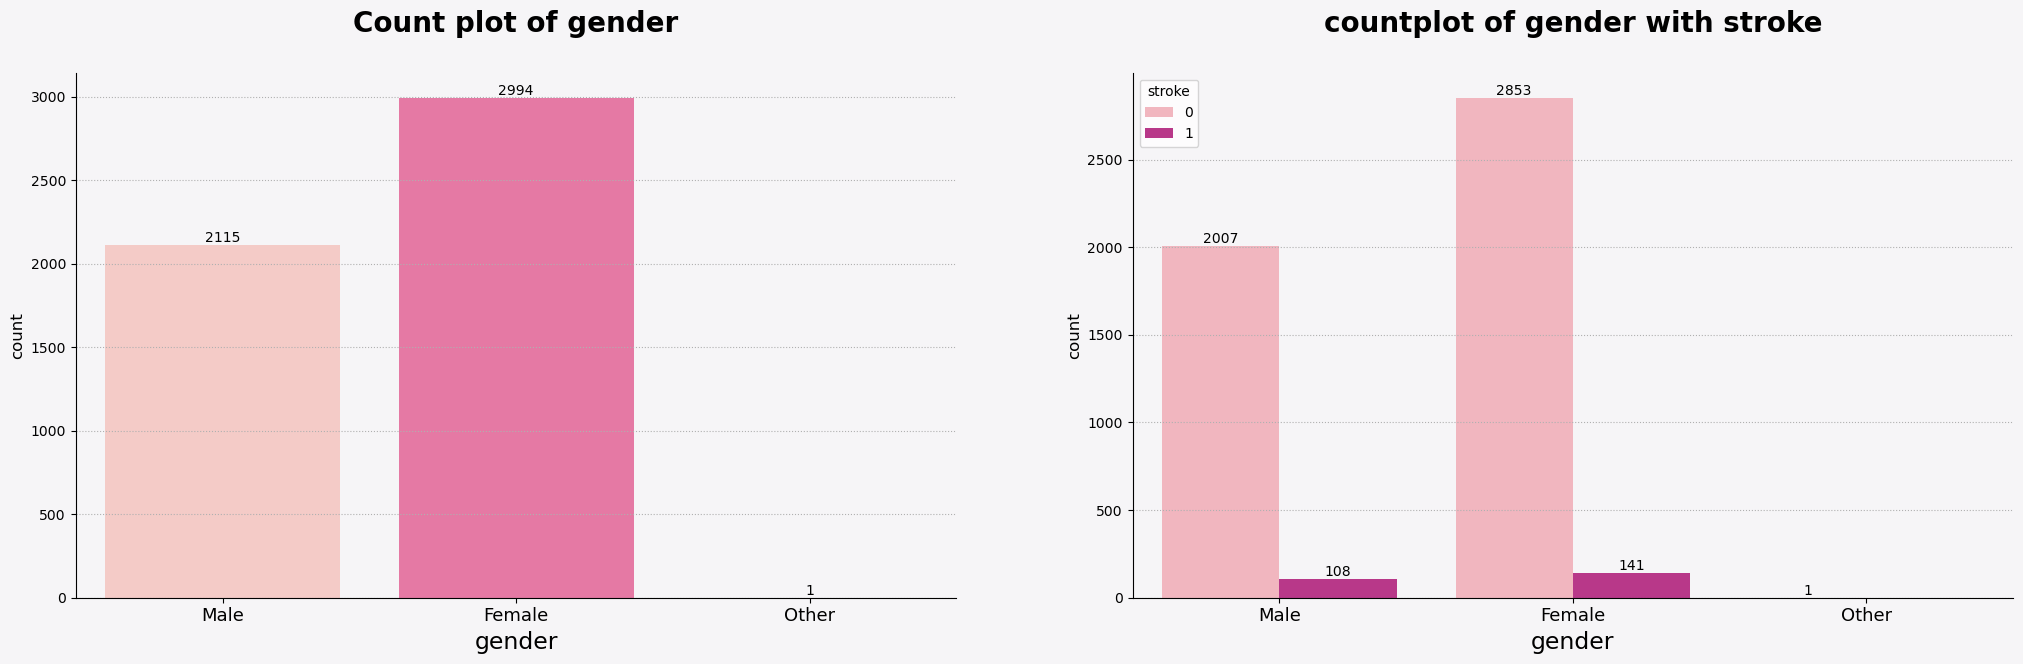

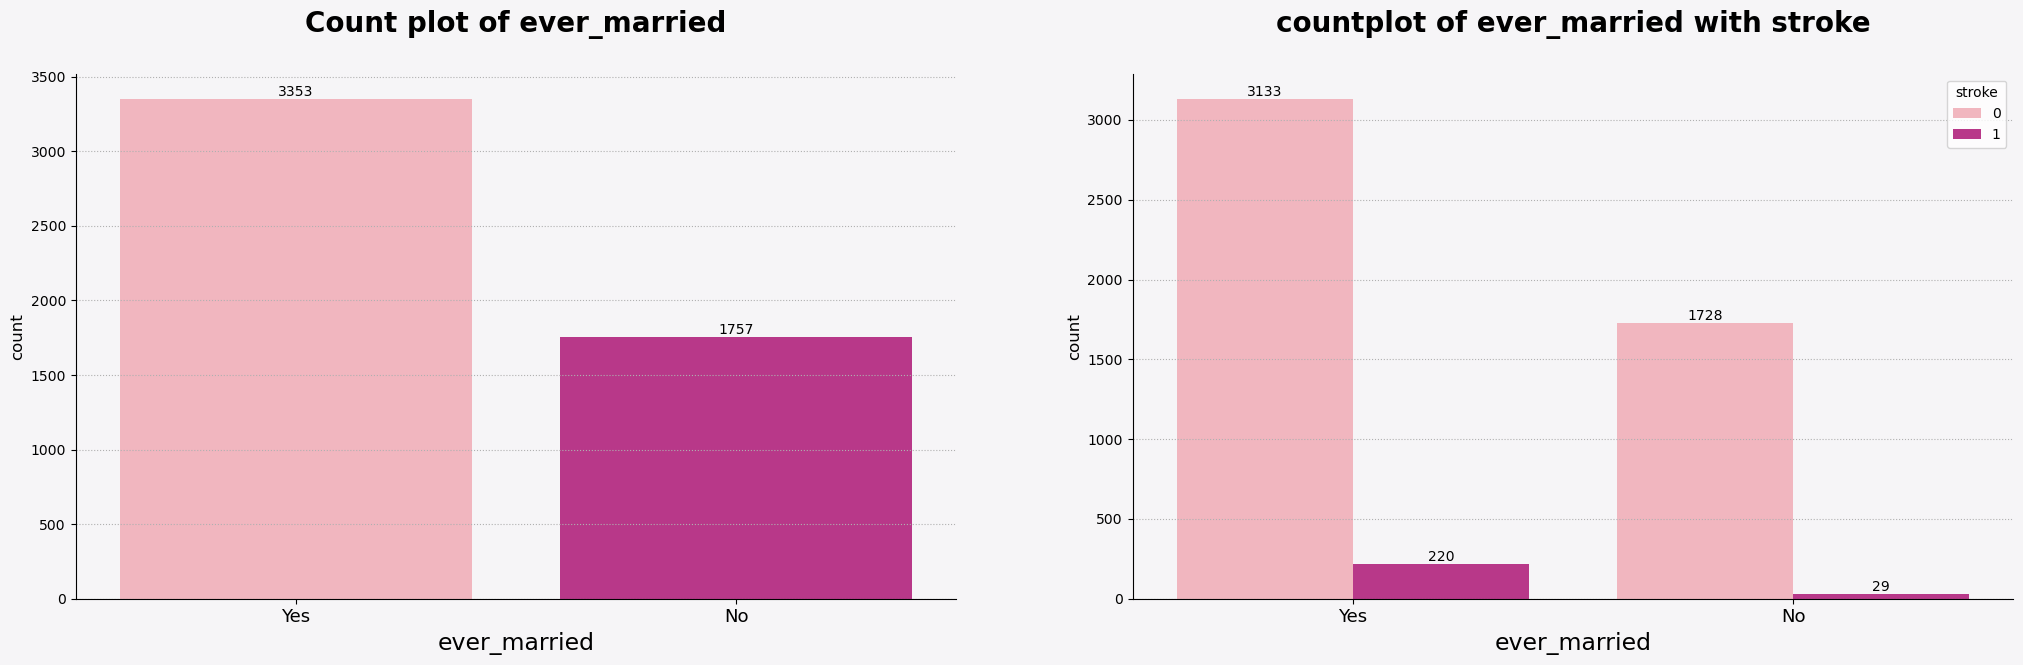

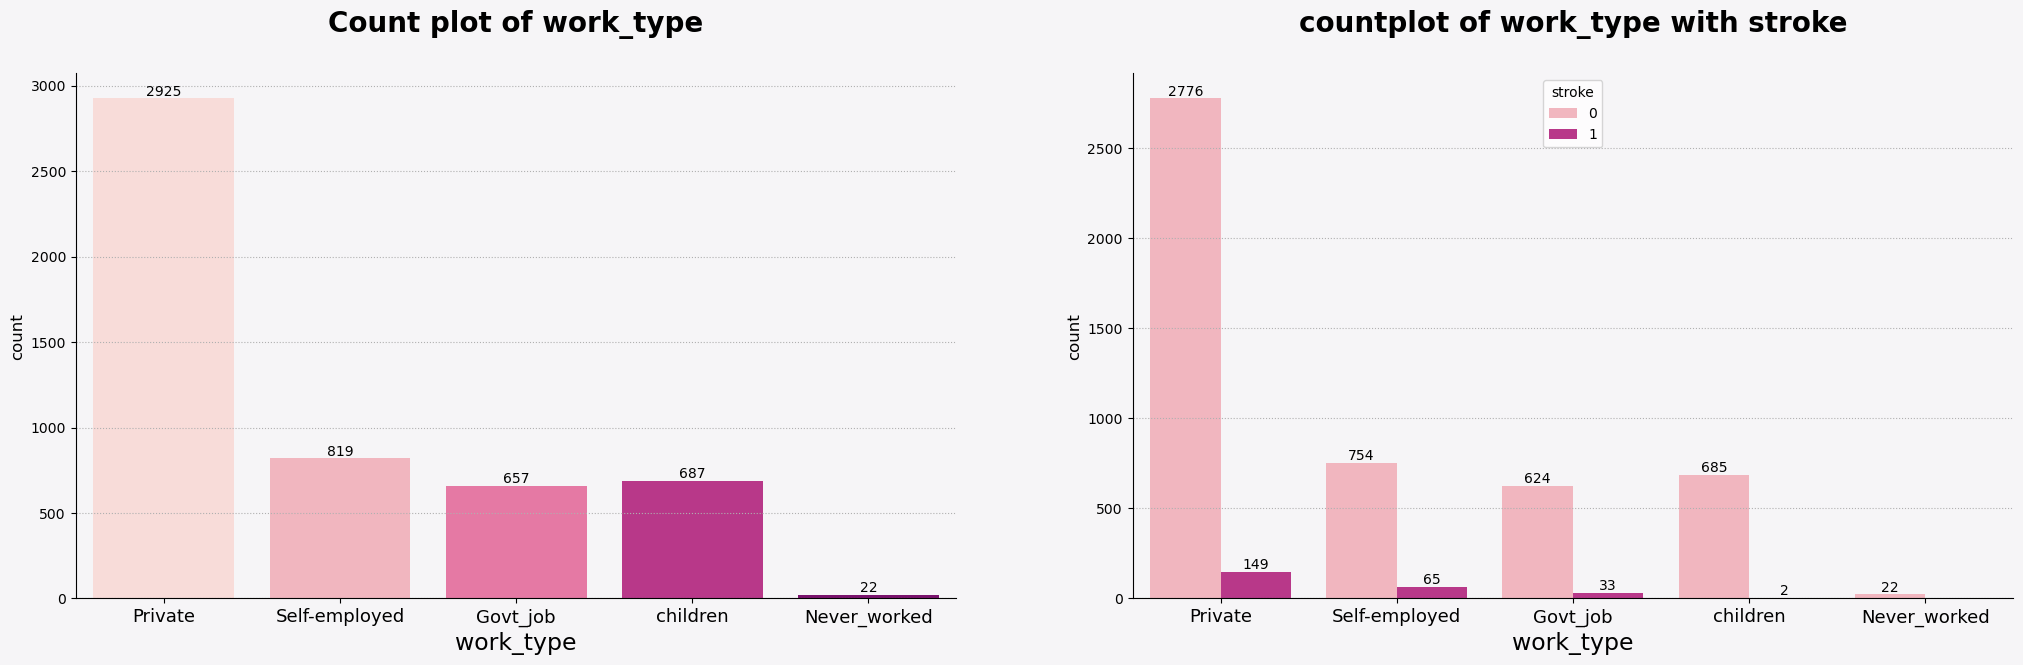

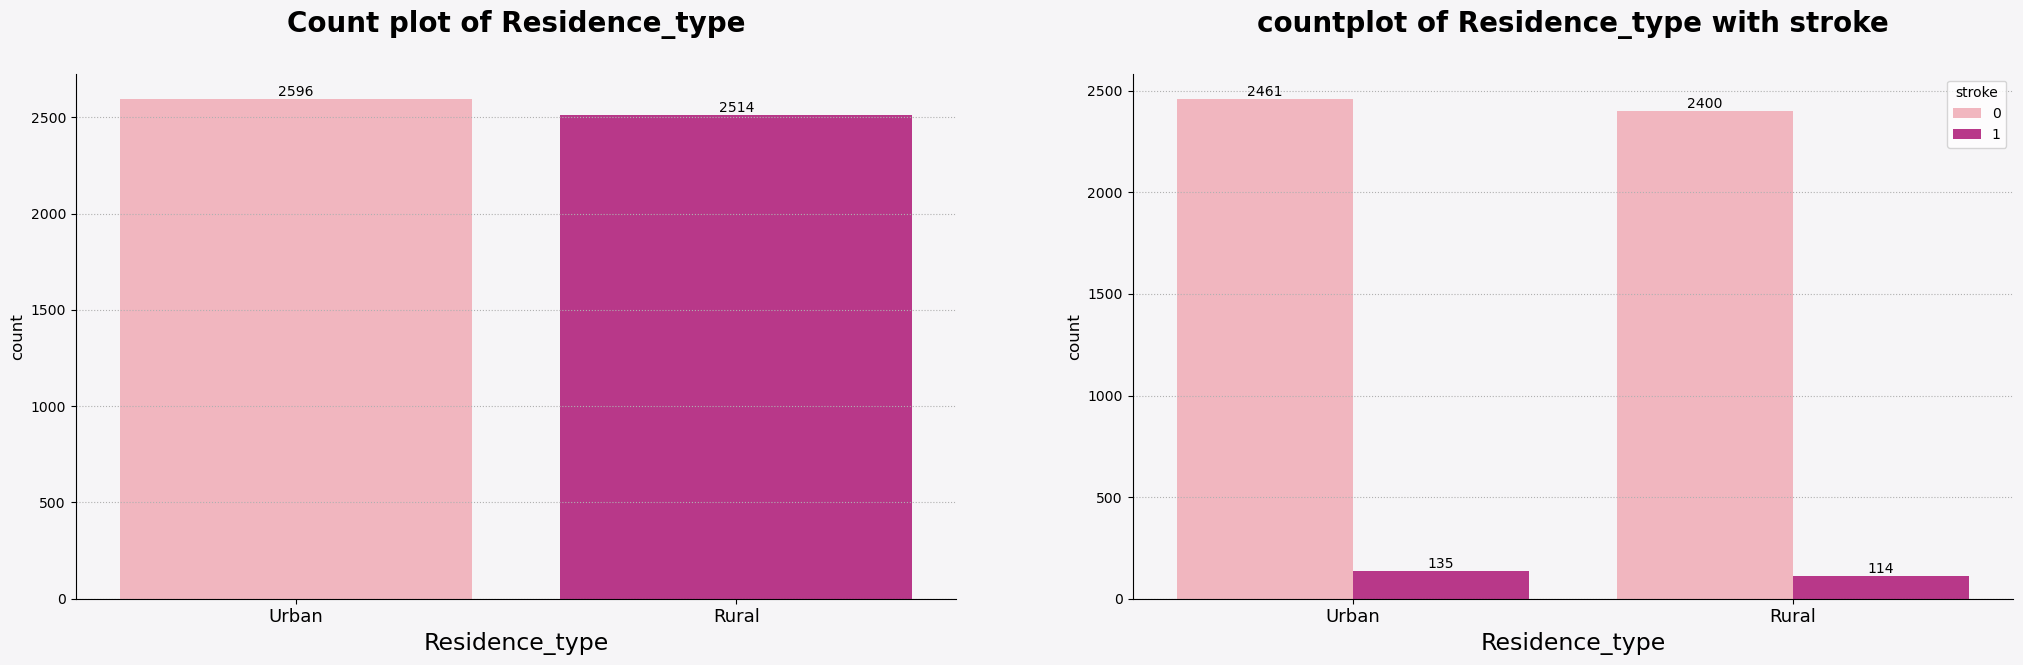

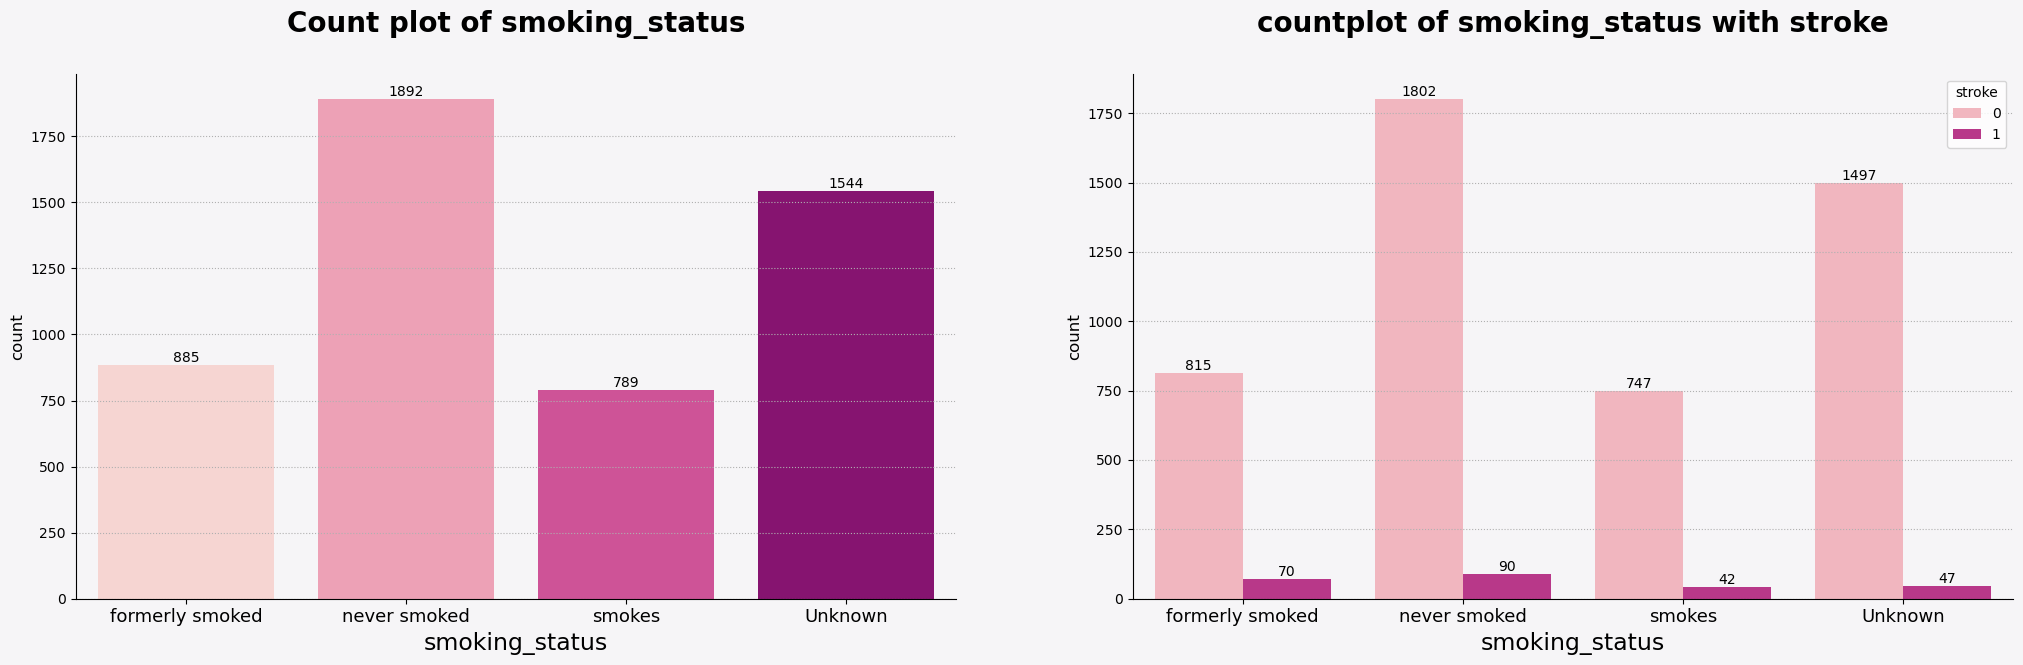

In [160]:
for i in df.columns:
    if df[i].dtype == "object":
        
        fig=plt.figure(figsize=(25,15))
        fig.patch.set_facecolor("#f6f5f7")
        
        xx=plt.subplot(2,2,1)
        xx.set_facecolor("#f6f5f7")
        x=sns.countplot(data=df, x=i,palette='RdPu')
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        for x in ["top","right"]:
            xx.spines[x].set_visible(False)
        xx.grid(linestyle=':',axis='y')
        
    
    
        
        vv=plt.subplot(2,2,2)
        vv.set_facecolor("#f6f5f7")
        v=sns.countplot(data=df,x=i,hue="stroke",palette='RdPu')
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with stroke\n",fontsize=20,weight="bold" )
        for v in ["top","right"]:
            vv.spines[v].set_visible(False)
        vv.grid(linestyle=':',axis='y')
        plt.show()

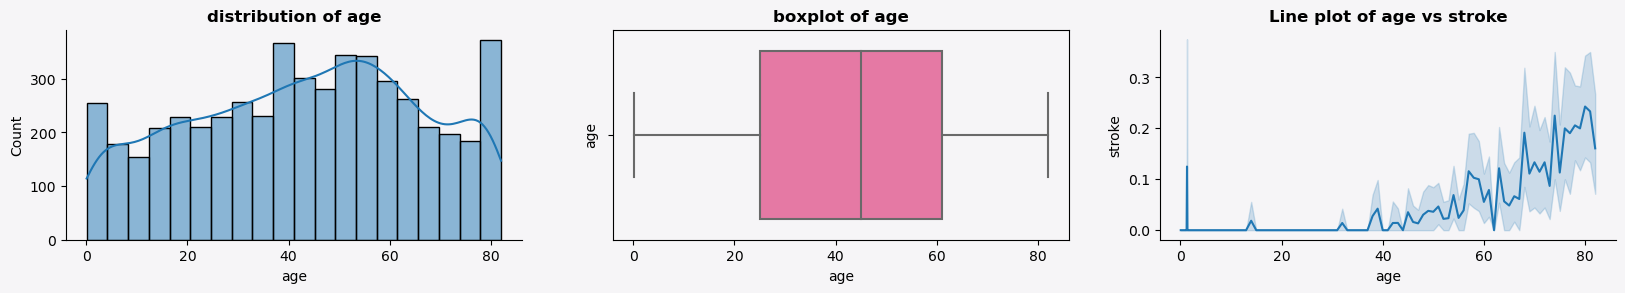

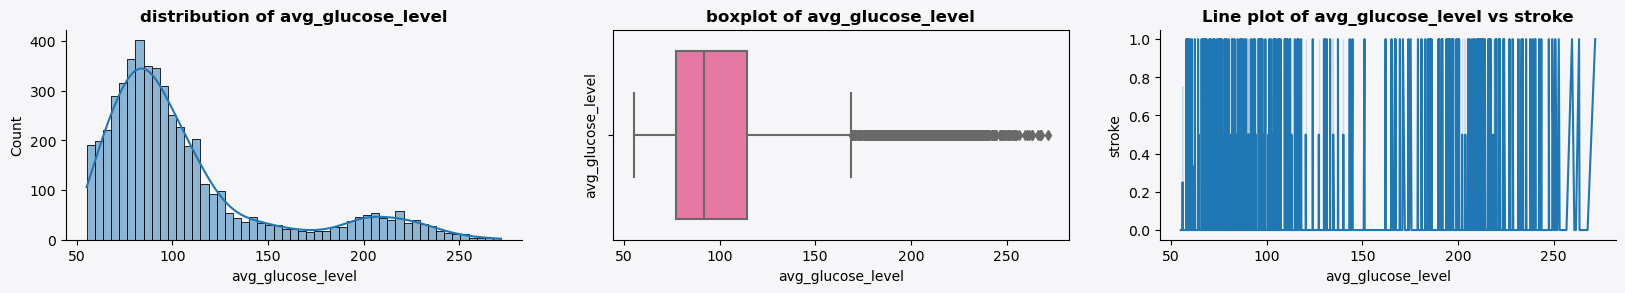

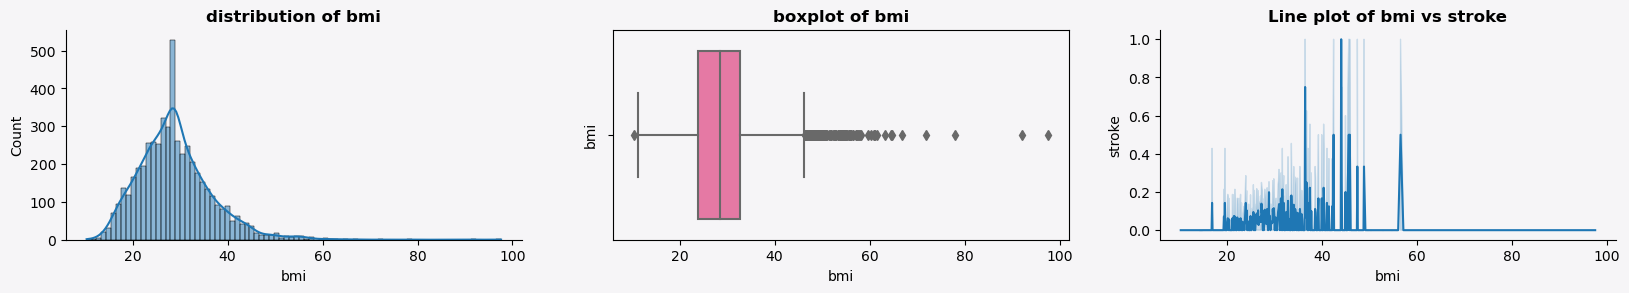

In [209]:
for i in dfnumerical:
    fig=plt.figure(figsize=(20,6))
    fig.patch.set_facecolor("#f6f5f7")
        
    v=plt.subplot(2,3,1)
    v.set_facecolor('#f6f5f7')
    vv=sns.histplot(data=dfnumerical,x=i,kde=True,palette='RdPu')
    plt.title(f"distribution of {i}",weight='bold')
    for vv in ["top","right"]:
        v.spines[vv].set_visible(False)
        
        
    b=plt.subplot(2,3,2) 
    b.set_facecolor("#f6f5f7")
    sns.boxplot(dfnumerical[i],palette='RdPu')
    plt.ylabel(i)
    plt.title(f"boxplot of {i}",weight='bold')
        
    l=plt.subplot(2,3,3)
    l.set_facecolor("#f6f5f7")
    ll=sns.lineplot(data=df, x=i, y="stroke",palette='RdPu')
    for ll in ["top","right"]:
        l.spines[ll].set_visible(False)
    plt.title(f"Line plot of {i} vs stroke",weight='bold')

In [227]:
pd.crosstab(df.gender,df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,399,11,1754,504,326
Male,258,11,1170,315,361
Other,0,0,1,0,0


In [229]:
pd.crosstab(df.gender,df.ever_married)

ever_married,No,Yes
gender,,
Female,993,2001
Male,763,1352
Other,1,0


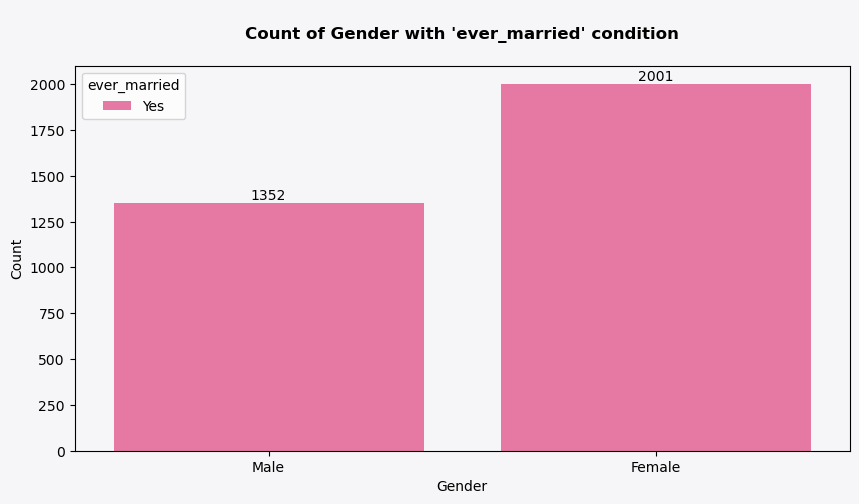

In [246]:
fig,x=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
x.set_facecolor('#f6f5f7')
j = df[df['ever_married'] == "Yes"]
x=sns.countplot(data=j, x="gender", palette='RdPu', hue='ever_married')
for i in x.containers:
    x.bar_label(i)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("\nCount of Gender with 'ever_married' condition\n",weight="bold")
plt.show()


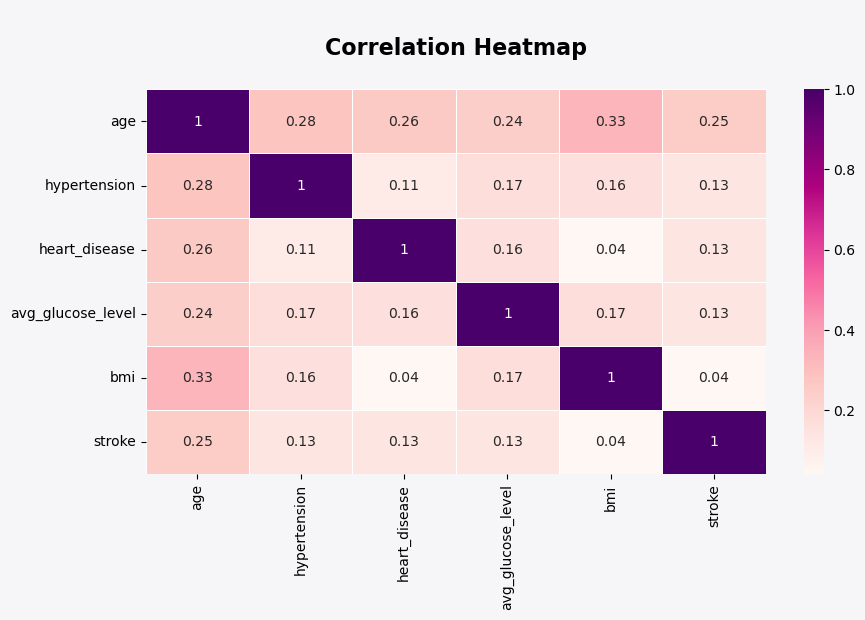

In [261]:
fig,x=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
v=round(df.corr(),2)
sns.heatmap(v,annot=True,cmap="RdPu", linewidths=.5)
plt.title("\nCorrelation Heatmap\n", fontsize=16, weight="bold");

##  Data Preprocessing

### Define features x & target y

In [14]:
x=df.drop("stroke",axis=1)
y=df.stroke

In [15]:
x.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,Female,80.00,1,0,Yes,Private,Urban,83.75,28.89,never smoked
5106,Female,81.00,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked
5107,Female,35.00,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked
5108,Male,51.00,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked
5109,Female,44.00,0,0,Yes,Govt_job,Urban,85.28,26.20,Unknown


In [16]:
y.tail()

5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, dtype: int64

## encode the string columns

In [17]:
l=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)

In [18]:
x.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,0,101,1,0,1,2,1,1360,162,2
5106,0,102,0,0,1,3,1,3030,274,2
5107,0,56,0,0,1,3,0,1314,180,2
5108,1,72,0,0,1,2,0,3363,129,1
5109,0,65,0,0,1,0,1,1454,135,0


## Data scaling

In [19]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [20]:
x

array([[ 1.18807255,  1.03951283, -0.32860186, ...,  1.78017003,
         1.0601011 , -0.35178071],
       [-0.840344  ,  0.7795668 , -0.32860186, ...,  1.54302885,
         0.00597702,  0.58155233],
       [ 1.18807255,  1.60272924, -0.32860186, ...,  0.54287232,
         0.50601024,  0.58155233],
       ...,
       [-0.840344  , -0.34686602, -0.32860186, ..., -0.51521182,
         0.24923642,  0.58155233],
       [ 1.18807255,  0.34632341, -0.32860186, ...,  1.33937707,
        -0.43999855, -0.35178071],
       [-0.840344  ,  0.04305303, -0.32860186, ..., -0.38849515,
        -0.35891208, -1.28511375]])

## Split Data into train and test

In [21]:
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,shuffle=True,test_size=0.1,random_state=42)

In [22]:
x_tr.shape

(4599, 10)

In [23]:
x_tst.shape

(511, 10)

## Machine Learning Algorithms

### LazyClassifier

In [134]:
modelll=LazyClassifier(verbose=1)
models=modelll.fit(x_tr,x_tst,y_tr,y_tst)

  7%|█████▋                                                                             | 2/29 [00:00<00:04,  6.06it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9432485322896281, 'Balanced Accuracy': 0.4989648033126294, 'ROC AUC': 0.4989648033126294, 'F1 Score': 0.9176012912303935, 'Time taken': 0.20845794677734375}

{'Model': 'BaggingClassifier', 'Accuracy': 0.9412915851272016, 'Balanced Accuracy': 0.4979296066252588, 'ROC AUC': 0.4979296066252588, 'F1 Score': 0.9166206363234644, 'Time taken': 0.1347641944885254}

{'Model': 'BernoulliNB', 'Accuracy': 0.9334637964774951, 'Balanced Accuracy': 0.4937888198757764, 'ROC AUC': 0.4937888198757764, 'F1 Score': 0.9126781653818424, 'Time taken': 0.019355297088623047}



 21%|█████████████████▏                                                                 | 6/29 [00:00<00:01, 17.08it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.05217432975769043}

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9099804305283757, 'Balanced Accuracy': 0.5822981366459627, 'ROC AUC': 0.5822981366459626, 'F1 Score': 0.9114391107748576, 'Time taken': 0.03586316108703613}

{'Model': 'DummyClassifier', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.010550975799560547}

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8904109589041096, 'Balanced Accuracy': 0.5046583850931677, 'ROC AUC': 0.5046583850931677, 'F1 Score': 0.893836091096365, 'Time taken': 0.0033338069915771484}



 31%|█████████████████████████▊                                                         | 9/29 [00:00<00:01, 11.89it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9412915851272016, 'Balanced Accuracy': 0.4979296066252588, 'ROC AUC': 0.4979296066252588, 'F1 Score': 0.9166206363234644, 'Time taken': 0.33134984970092773}

{'Model': 'GaussianNB', 'Accuracy': 0.8571428571428571, 'Balanced Accuracy': 0.5879917184265011, 'ROC AUC': 0.5879917184265011, 'F1 Score': 0.8811011958524515, 'Time taken': 0.016924619674682617}

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9393346379647749, 'Balanced Accuracy': 0.4968944099378882, 'ROC AUC': 0.4968944099378882, 'F1 Score': 0.9156380022946242, 'Time taken': 0.04993844032287598}



 41%|█████████████████████████████████▉                                                | 12/29 [00:01<00:02,  6.90it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.9060665362035225, 'Balanced Accuracy': 0.5129399585921325, 'ROC AUC': 0.5129399585921325, 'F1 Score': 0.90264738791783, 'Time taken': 0.6499478816986084}


 52%|██████████████████████████████████████████▍                                       | 15/29 [00:02<00:03,  4.57it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.9099804305283757, 'Balanced Accuracy': 0.5150103519668737, 'ROC AUC': 0.5150103519668737, 'F1 Score': 0.9048570945374599, 'Time taken': 0.9891605377197266}

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9393346379647749, 'Balanced Accuracy': 0.5137163561076604, 'ROC AUC': 0.5137163561076604, 'F1 Score': 0.9188990896541072, 'Time taken': 0.008929967880249023}

{'Model': 'LinearSVC', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.10183858871459961}

{'Model': 'LogisticRegression', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.017467021942138672}

{'Model': 'NearestCentroid', 'Accuracy': 0.7397260273972602, 'Balanced Accuracy': 0.660455486542443, 'ROC AUC': 0.660455486542443, 'F1 Score': 0.8091434638580624, 'Time taken': 0.015300512313842773}

{'Model': 'PassiveAggressiveClassifier', 'Accura


 76%|██████████████████████████████████████████████████████████████▏                   | 22/29 [00:03<00:01,  6.91it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.6112165451049805}

{'Model': 'RidgeClassifier', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.013963699340820312}

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.015477180480957031}

{'Model': 'SGDClassifier', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.018915653228759766}


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  7.77it/s]

{'Model': 'SVC', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.9185799729886166, 'Time taken': 0.2433485984802246}

{'Model': 'XGBClassifier', 'Accuracy': 0.9412915851272016, 'Balanced Accuracy': 0.4979296066252588, 'ROC AUC': 0.4979296066252588, 'F1 Score': 0.9166206363234644, 'Time taken': 0.06084322929382324}

[LightGBM] [Info] Number of positive: 221, number of negative: 4378

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Info] Total Bins 638

[LightGBM] [Info] Number of data points in the train set: 4599, number of used features: 10

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048054 -> initscore=-2.986185

[LightGBM] [Info] Start training from score -2.986185

{'Model': 'LGBMClassifier', 'Accuracy': 0.9452054794520548, 'Balanced Accuracy': 0

In [135]:
models

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 NearestCentroid                    0.74               0.66     0.66      0.81   
 QuadraticDiscriminantAnalysis      0.87               0.65     0.65      0.89   
 GaussianNB                         0.86               0.59     0.59      0.88   
 DecisionTreeClassifier             0.91               0.58     0.58      0.91   
 LGBMClassifier                     0.95               0.52     0.52      0.92   
 LabelSpreading                     0.91               0.52     0.52      0.90   
 LinearDiscriminantAnalysis         0.94               0.51     0.51      0.92   
 LabelPropagation                   0.91               0.51     0.51      0.90   
 ExtraTreeClassifier                0.89               0.50     0.50      0.89   
 PassiveAggressiveClassifier        0.95               0.50     0.50      0.92   
 SVC            

### LogisticRegression

In [24]:
model=LogisticRegression(penalty="l2",max_iter=100,C=3)
model.fit(x_tr,y_tr)

LogisticRegression(C=3)

In [25]:
model.score(x_tr,y_tr)

0.9519460752337464

In [26]:
model.score(x_tst,y_tst)

0.9452054794520548

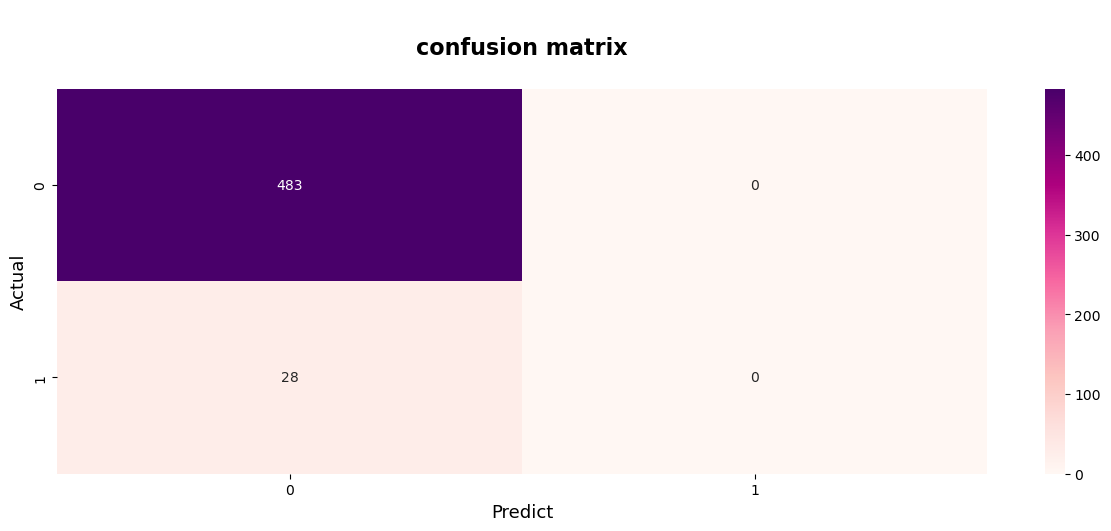

In [31]:
plt.figure(figsize=(15,5))
p=model.predict(x_tst)
c=confusion_matrix(y_tst,p)
sns.heatmap(c,annot=True, fmt='d', cmap="RdPu")
plt.title("\nconfusion matrix\n", fontsize=16, weight="bold")
plt.xlabel("Predict", fontsize=13)
plt.ylabel("Actual", fontsize=13);

### RandomForestClassifier

In [28]:
model2=RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(x_tr,y_tr)
model2.score(x_tr,y_tr)

1.0

In [29]:
model2.score(x_tst,y_tst)

0.9452054794520548

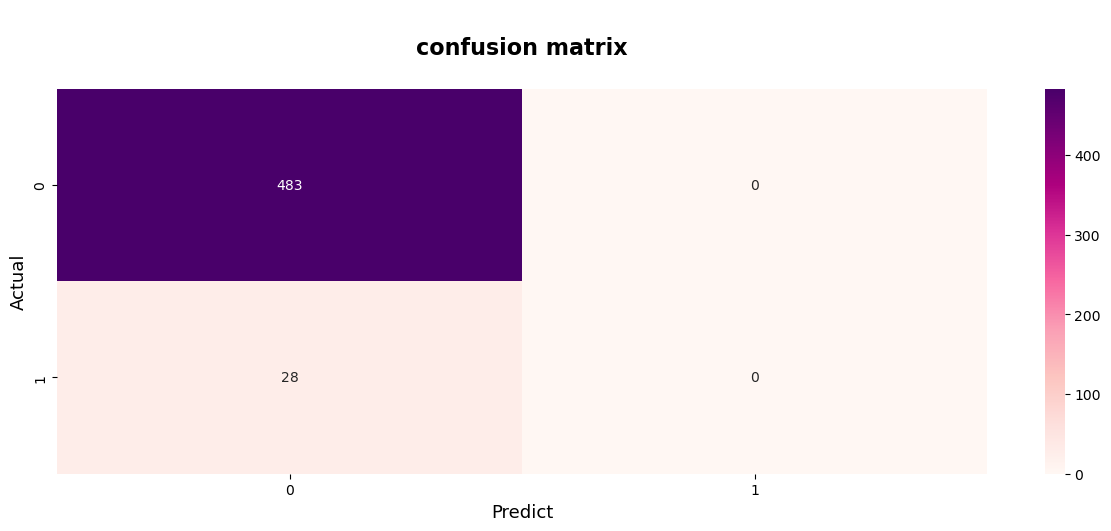

In [30]:
plt.figure(figsize=(15,5))
p2=model2.predict(x_tst)
c2=confusion_matrix(y_tst,p2)
sns.heatmap(c2,annot=True, fmt='d', cmap="RdPu")
plt.title("\nconfusion matrix\n", fontsize=16, weight="bold")
plt.xlabel("Predict", fontsize=13)
plt.ylabel("Actual", fontsize=13);